In [2]:
population = [2,5,2,10,6]

In [3]:
import numpy as np

In [4]:
sample_size = 7
pop_mean = np.mean(population)
sample = np.random.choice(population, size=sample_size)

In [9]:
import matplotlib.pyplot as plt

In [11]:
def test_consistent(population, estimator, min_size=10, max_size=1000000, size_step=100):
    estimates = []
    sample_sizes = range(min_size, max_size, size_step)
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    pop_mean = np.mean(population)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes) * pop_mean)

    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_mean), '.', )
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes))

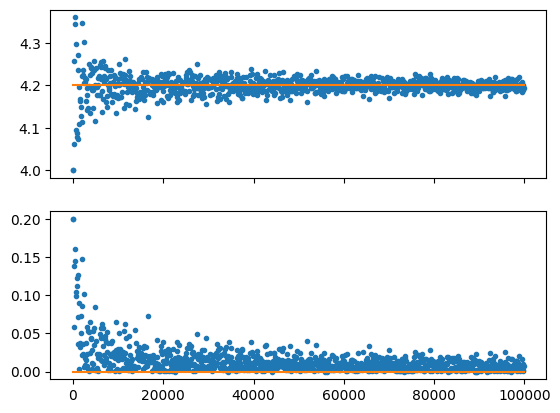

In [13]:
population = [1,5,4,2,9]
test_consistent(population, np.mean, max_size=100000)

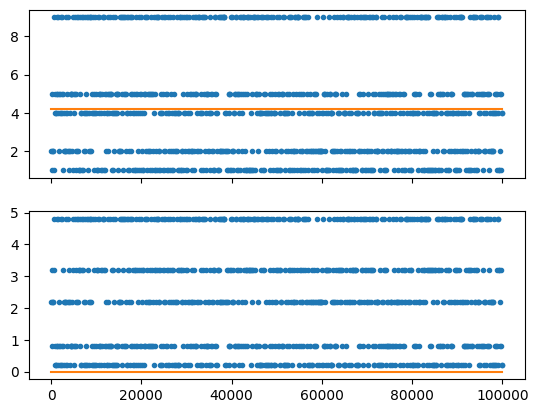

In [14]:
test_consistent(population, lambda x: x[0],  max_size=100000)

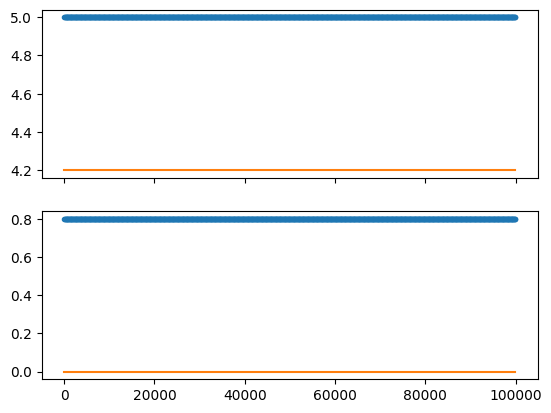

In [15]:
test_consistent(population, lambda x: (np.max(x) + np.min(x)) / 2, max_size=100000)

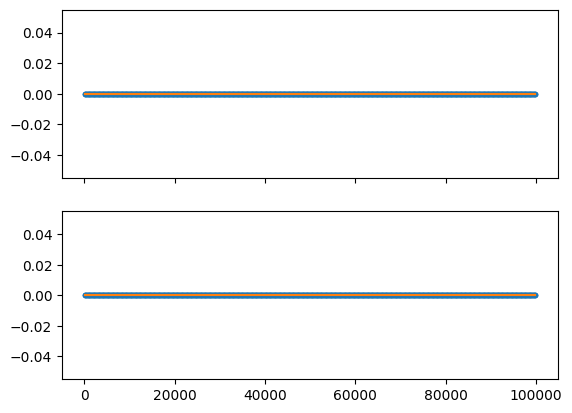

In [16]:
test_consistent([1,-1,2,-2], lambda x: (np.max(x) + np.min(x)) / 2, max_size=100000)

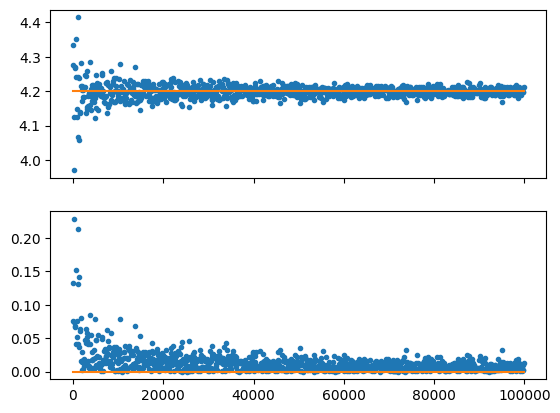

In [18]:
test_consistent(population, lambda x: np.mean(x) * len(x) / (len(x) - 1), max_size=100000)

# Unbiasedness

In [23]:
def find_bias(population, estimator,
              sample_size,
              iterations=100000):
    estimates = []
    for _ in range(iterations):
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    pop_mean = np.mean(population)
    return np.abs(np.mean(estimates) - pop_mean)

In [25]:
population = [1,2,5,4,8,4]
find_bias(population, np.mean, 10)

0.0015710000000002111

In [28]:
find_bias(population, lambda x: np.mean(x) * len(x) / (len(x) - 1), 20)

0.2163889473684204

In [32]:
find_bias(population, lambda x: x[0], 5)

0.011229999999999851